In [18]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import requests
import json
from pathlib import Path
from scipy import stats

In [19]:
# Store filepaths into variable
flight_data_csv = "support_files/Flight_on_time_HIX.csv"
cities = "support_files/airports.csv"

In [20]:
# Load Flight Data
flight_data_df = pd.read_csv(flight_data_csv)
flight_data_df.head()

Airline  Flight_Number Plane_ID FlightDate Origin_Airport  \
0      TR           4135   GJLOAB  12/1/2019            IYF   
1      TR           3776   GDISCI  12/1/2019            HEN   
2      RO           4754   GHHWLL  12/1/2019            HIX   
3      XM           5604   GBGWFC  12/1/2019            HIX   
4      XM           5612   GBISBC  12/1/2019            HIX   

  Destination_Airport  Flight_Distance  Scheduled_Departure_Time  \
0                 HIX              678                         1   
1                 HIX             1700                        10   
2                 IZN              413                        10   
3                 IZU              130                        10   
4                 LKF              258                        10   

   Actual_Departure_Time  Departure_Delay_Minutes  Departure_Taxi  \
0                    103                       62              15   
1                     25                       15              21   
2                     10                        0              15   
3                     44                       34              34   
4                    234                      144              26   

   Departure_WheelsOff  Scheduled_Arrival_Time  Actual_Arrival_Time  \
0                  118                     127                  219   
1                   46                     616                  624   
2                   25                     242                  227   
3                  118                     111                  155   
4                  300                     132                  358   

   Arrival_Delay_Minutes  Arrival_Taxi  Arrival_WheelsOn  Delay_Reason  
0                     52             7               212  LateAircraft  
1                      8            27               557           NaN  
2                      0             5               222           NaN  
3                     44             4               151       Weather  
4                    146             6               352       Carrier

In [21]:
cities_df = pd.read_csv(cities)
cities_df.head()

code       city                         airport           country
0  AAA       Anaa                            Anaa  French Polynesia
1  AAB   Arrabury                        Arrabury         Australia
2  AAC      Arish  El Arish International Airport             Egypt
3  AAD  Ad-Dabbah                       Ad-Dabbah             Sudan
4  AAE     Annaba                     Les Salines           Algeria

In [22]:
def find_city_name(row, column, df):
    value_to_find = row[column]
    matching_row = df[df['code'] == value_to_find]

    if not matching_row.empty:
        return matching_row['city'].values[0]
    else:
        return None


flight_data_df['origin_city'] = flight_data_df.apply(find_city_name, args=("Origin_Airport",cities_df), axis=1)

flight_data_df['destination_city'] = flight_data_df.apply(find_city_name, args=("Destination_Airport",cities_df), axis=1)


In [23]:
flight_data_df.head()

Airline  Flight_Number Plane_ID FlightDate Origin_Airport  \
0      TR           4135   GJLOAB  12/1/2019            IYF   
1      TR           3776   GDISCI  12/1/2019            HEN   
2      RO           4754   GHHWLL  12/1/2019            HIX   
3      XM           5604   GBGWFC  12/1/2019            HIX   
4      XM           5612   GBISBC  12/1/2019            HIX   

  Destination_Airport  Flight_Distance  Scheduled_Departure_Time  \
0                 HIX              678                         1   
1                 HIX             1700                        10   
2                 IZN              413                        10   
3                 IZU              130                        10   
4                 LKF              258                        10   

   Actual_Departure_Time  Departure_Delay_Minutes  Departure_Taxi  \
0                    103                       62              15   
1                     25                       15              21   
2                     10                        0              15   
3                     44                       34              34   
4                    234                      144              26   

   Departure_WheelsOff  Scheduled_Arrival_Time  Actual_Arrival_Time  \
0                  118                     127                  219   
1                   46                     616                  624   
2                   25                     242                  227   
3                  118                     111                  155   
4                  300                     132                  358   

   Arrival_Delay_Minutes  Arrival_Taxi  Arrival_WheelsOn  Delay_Reason  \
0                     52             7               212  LateAircraft   
1                      8            27               557           NaN   
2                      0             5               222           NaN   
3                     44             4               151       Weather   
4                    146             6               352       Carrier   

  origin_city destination_city  
0        None          Hiva Oa  
1      Hendon          Hiva Oa  
2     Hiva Oa             None  
3     Hiva Oa             None  
4     Hiva Oa             None

In [24]:
unique_cities = pd.unique(flight_data_df[['origin_city', 'destination_city']].values.ravel('K'))
adjusted_unique_cities = []

import re

def remove_parent(input_string):
    if input_string is None:
        return
    
    if '(' not in input_string and ')' not in input_string:
        return input_string  
    
    pattern = r'\(.*?\)\s*'
    result = re.sub(pattern, '', input_string)
    return result

for city in unique_cities:
    adjusted_unique_cities.append(remove_parent(city))

adjusted_unique_cities




[None,
 'Hendon',
 'Hiva Oa',
 'Tlemcen',
 'Erechim',
 'Errol ',
 'Lowai',
 'Liverpool',
 'Barreirinhas',
 'Red Lake',
 'Kuopio',
 'La Grange ',
 'Moma',
 'Fagernes',
 'Chile Chico',
 'Tasikmalaya',
 'Bennettsville ',
 'Benson',
 'Uliastai',
 'Milford ',
 'Maputo',
 'Kigoma',
 'Estevan',
 'Fort Smith ',
 'Lashio',
 'Moanda',
 'Fitiuta',
 'Cortes Bay',
 'Xichang',
 'Fairbury ',
 'Unguia',
 'Macmillan Pass',
 'Villa Dolores',
 'Errachidia',
 'Lublin',
 'Vitoria Da Conquista',
 'Truckee ',
 'Morelia',
 'Lago Argentino',
 'Tete',
 'Taskul',
 'Lawton ',
 'Termez',
 'Vredendal',
 'Angelholm, Helsingborg',
 'Londolozi',
 'Isles Of Scilly',
 'Ceres',
 'La Rochelle',
 'Manaung',
 'Fuyun',
 'Iraan ',
 'Funafuti Atol',
 'Bemichi',
 'Moses Lake ',
 'Vaeroy',
 'Seo De Urgel',
 'Barahona',
 'Viqueque',
 'Lichinga',
 'Tokushima',
 'Likiep Island',
 'Tenerife',
 'Lydd',
 'Vanuabalavu',
 'Laoag',
 'Wendover ',
 'Lake Charles ',
 'Cherribah',
 'Rivers Inlet',
 'Miandrivazo',
 'Karawari',
 'Charleston ',

In [25]:
def getCityCood(city):
    
    city_url = f"https://geocoding-api.open-meteo.com/v1/search?name={city}&count=10&language=en&format=json"

    city_lat_lon = requests.get(city_url).json()

    return {'lat': city_lat_lon['results'][0]['latitude'], 'lon': city_lat_lon['results'][0]['longitude']}


def getCityWeather(lat, lon):
    url = f'https://archive-api.open-meteo.com/v1/archive?latitude={lat}&longitude={lon}&start_date=2019-12-01&end_date=2019-12-31&hourly=temperature_2m,precipitation,cloudcover,windspeed_100m'

    city_weather = requests.get(url).json()

    return city_weather


def getWeather(city):

    try:
        params = getCityCood(city)
    except:
        print("error using the coord api")
        return
    try:
        cityWeather = getCityWeather(params['lat'], params['lon'])
    except:
        print("error using the weather api")

    return cityWeather

weatherInfo = {}

for city in adjusted_unique_cities:
    weatherInfo[city] = getWeather(city)

weatherInfo

error using the coord api
error using the coord api
error using the coord api
error using the coord api
error using the coord api


{None: {'latitude': 44.90001,
  'longitude': 7.5,
  'generationtime_ms': 0.20003318786621094,
  'utc_offset_seconds': 0,
  'timezone': 'GMT',
  'timezone_abbreviation': 'GMT',
  'elevation': 246.0,
  'hourly_units': {'time': 'iso8601',
   'temperature_2m': '°C',
   'precipitation': 'mm',
   'cloudcover': '%',
   'windspeed_100m': 'km/h'},
  'hourly': {'time': ['2019-12-01T00:00',
    '2019-12-01T01:00',
    '2019-12-01T02:00',
    '2019-12-01T03:00',
    '2019-12-01T04:00',
    '2019-12-01T05:00',
    '2019-12-01T06:00',
    '2019-12-01T07:00',
    '2019-12-01T08:00',
    '2019-12-01T09:00',
    '2019-12-01T10:00',
    '2019-12-01T11:00',
    '2019-12-01T12:00',
    '2019-12-01T13:00',
    '2019-12-01T14:00',
    '2019-12-01T15:00',
    '2019-12-01T16:00',
    '2019-12-01T17:00',
    '2019-12-01T18:00',
    '2019-12-01T19:00',
    '2019-12-01T20:00',
    '2019-12-01T21:00',
    '2019-12-01T22:00',
    '2019-12-01T23:00',
    '2019-12-02T00:00',
    '2019-12-02T01:00',
    '2019-12-02T0

In [26]:
weatherJsonPath = "support_files/weather_info.json"

with open(weatherJsonPath, 'w') as jsonfile:
    json.dump(weatherInfo, jsonfile, default=str, indent=4)

In [27]:
from datetime import datetime

def get_hour_from_df(hourString):

    if len(hourString) > 2:
        if len(hourString) == 3:
            return "0" + hourString[-3]
        return hourString[-4] + hourString[-3]
    
    return '00'


def extract_hour(datetimeString):
    try:
        dt_obj = datetime.strptime(datetimeString, '%Y-%m-%dT%H:%M')
        
        hour_str = dt_obj.strftime('%H')
        
        return hour_str
    except ValueError:
        return None  
    
    
def normalize_date_format(date_str):
    try:
        if '/' in date_str:
            date_obj = datetime.strptime(date_str, '%m/%d/%Y')
        elif 'T' in date_str:
            date_obj = datetime.strptime(date_str, '%Y-%m-%dT%H:%M')
        else:
            return None  

        normalized_date_str = date_obj.strftime('%Y-%m-%d')
        return normalized_date_str
    except ValueError:
        return None 
    

def compare_dates(date_str1, date_str2):

    normalized_date_str1 = normalize_date_format(date_str1)
    normalized_date_str2 = normalize_date_format(date_str2)

    if normalized_date_str1 and normalized_date_str2:
        return normalized_date_str1 == normalized_date_str2
    else:
        return False

def find_item_position(my_array, item_to_find):
    position = None

    for i in range(len(my_array)):
        if my_array[i] == item_to_find:
            position = i
            break 

    return position   
    

def getTemperature(row, orig_dest_city, orig_dest_hour):

    date = row['FlightDate']
    city = row[orig_dest_city]
    hour = row[orig_dest_hour]

    try:

        for i in range(len(weatherInfo[city]['hourly']['time'])):
            
            if compare_dates(date, weatherInfo[city]['hourly']['time'][i]) and extract_hour(weatherInfo[city]['hourly']['time'][i]) == get_hour_from_df(str(hour)):
                
                return weatherInfo[city]['hourly']['temperature_2m'][i]
            
    except:
        print('failed')    
    
    return "item not found"



def getWindSpeed(row, orig_dest_city, orig_dest_hour):

    date = row['FlightDate']
    city = row[orig_dest_city]
    hour = row[orig_dest_hour]

    try:

        for i in range(len(weatherInfo[city]['hourly']['time'])):
            
            if compare_dates(date, weatherInfo[city]['hourly']['time'][i]) and extract_hour(weatherInfo[city]['hourly']['time'][i]) == get_hour_from_df(str(hour)):
                
                return weatherInfo[city]['hourly']['windspeed_100m'][i]
            
    except:
        print('failed')    
    
    return "item not found"



def getCloudcover(row, orig_dest_city, orig_dest_hour):

    date = row['FlightDate']
    city = row[orig_dest_city]
    hour = row[orig_dest_hour]

    try:

        for i in range(len(weatherInfo[city]['hourly']['time'])):
            
            if compare_dates(date, weatherInfo[city]['hourly']['time'][i]) and extract_hour(weatherInfo[city]['hourly']['time'][i]) == get_hour_from_df(str(hour)):
                
                return weatherInfo[city]['hourly']['cloudcover'][i]
            
    except:
        print('failed')    
    
    return "item not found"


def getPrecipitation(row, orig_dest_city, orig_dest_hour):

    date = row['FlightDate']
    city = row[orig_dest_city]
    hour = row[orig_dest_hour]

    try:

        for i in range(len(weatherInfo[city]['hourly']['time'])):
            
            if compare_dates(date, weatherInfo[city]['hourly']['time'][i]) and extract_hour(weatherInfo[city]['hourly']['time'][i]) == get_hour_from_df(str(hour)):
                
                return weatherInfo[city]['hourly']['precipitation'][i]
            
    except:
        print('failed')    
    
    return "item not found"
   

In [28]:
flight_data_df['temperature_arrival'] = flight_data_df.apply(getTemperature, args=("destination_city","Scheduled_Arrival_Time"), axis=1)
flight_data_df.head()

failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed

Airline  Flight_Number Plane_ID FlightDate Origin_Airport  \
0      TR           4135   GJLOAB  12/1/2019            IYF   
1      TR           3776   GDISCI  12/1/2019            HEN   
2      RO           4754   GHHWLL  12/1/2019            HIX   
3      XM           5604   GBGWFC  12/1/2019            HIX   
4      XM           5612   GBISBC  12/1/2019            HIX   

  Destination_Airport  Flight_Distance  Scheduled_Departure_Time  \
0                 HIX              678                         1   
1                 HIX             1700                        10   
2                 IZN              413                        10   
3                 IZU              130                        10   
4                 LKF              258                        10   

   Actual_Departure_Time  Departure_Delay_Minutes  ...  Departure_WheelsOff  \
0                    103                       62  ...                  118   
1                     25                       15  ...                   46   
2                     10                        0  ...                   25   
3                     44                       34  ...                  118   
4                    234                      144  ...                  300   

   Scheduled_Arrival_Time  Actual_Arrival_Time  Arrival_Delay_Minutes  \
0                     127                  219                     52   
1                     616                  624                      8   
2                     242                  227                      0   
3                     111                  155                     44   
4                     132                  358                    146   

   Arrival_Taxi  Arrival_WheelsOn  Delay_Reason origin_city destination_city  \
0             7               212  LateAircraft        None          Hiva Oa   
1            27               557           NaN      Hendon          Hiva Oa   
2             5               222           NaN     Hiva Oa             None   
3             4               151       Weather     Hiva Oa             None   
4             6               352       Carrier     Hiva Oa             None   

  temperature_arrival  
0                23.5  
1                23.7  
2                 7.0  
3                 6.3  
4                 6.3  

[5 rows x 21 columns]

In [29]:
flight_data_df['windSpeed_arrival'] = flight_data_df.apply(getWindSpeed, args=("destination_city","Scheduled_Arrival_Time"), axis=1)
flight_data_df.head()

failed
failed


failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed

Airline  Flight_Number Plane_ID FlightDate Origin_Airport  \
0      TR           4135   GJLOAB  12/1/2019            IYF   
1      TR           3776   GDISCI  12/1/2019            HEN   
2      RO           4754   GHHWLL  12/1/2019            HIX   
3      XM           5604   GBGWFC  12/1/2019            HIX   
4      XM           5612   GBISBC  12/1/2019            HIX   

  Destination_Airport  Flight_Distance  Scheduled_Departure_Time  \
0                 HIX              678                         1   
1                 HIX             1700                        10   
2                 IZN              413                        10   
3                 IZU              130                        10   
4                 LKF              258                        10   

   Actual_Departure_Time  Departure_Delay_Minutes  ...  \
0                    103                       62  ...   
1                     25                       15  ...   
2                     10                        0  ...   
3                     44                       34  ...   
4                    234                      144  ...   

   Scheduled_Arrival_Time  Actual_Arrival_Time  Arrival_Delay_Minutes  \
0                     127                  219                     52   
1                     616                  624                      8   
2                     242                  227                      0   
3                     111                  155                     44   
4                     132                  358                    146   

   Arrival_Taxi  Arrival_WheelsOn  Delay_Reason  origin_city destination_city  \
0             7               212  LateAircraft         None          Hiva Oa   
1            27               557           NaN       Hendon          Hiva Oa   
2             5               222           NaN      Hiva Oa             None   
3             4               151       Weather      Hiva Oa             None   
4             6               352       Carrier      Hiva Oa             None   

  temperature_arrival windSpeed_arrival  
0                23.5              23.9  
1                23.7              26.1  
2                 7.0              10.6  
3                 6.3              11.4  
4                 6.3              11.4  

[5 rows x 22 columns]

In [30]:
flight_data_df['cloudcover_arrival'] = flight_data_df.apply(getCloudcover, args=("destination_city","Scheduled_Arrival_Time"), axis=1)
flight_data_df.head()

failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed

In [ ]:
flight_data_df['precipitation_arrival'] = flight_data_df.apply(getPrecipitation, args=("destination_city","Scheduled_Arrival_Time"), axis=1)
flight_data_df.head()

failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed

Airline  Flight_Number Plane_ID FlightDate Origin_Airport  \
0      TR           4135   GJLOAB  12/1/2019            IYF   
1      TR           3776   GDISCI  12/1/2019            HEN   
2      RO           4754   GHHWLL  12/1/2019            HIX   
3      XM           5604   GBGWFC  12/1/2019            HIX   
4      XM           5612   GBISBC  12/1/2019            HIX   

  Destination_Airport  Flight_Distance  Scheduled_Departure_Time  \
0                 HIX              678                         1   
1                 HIX             1700                        10   
2                 IZN              413                        10   
3                 IZU              130                        10   
4                 LKF              258                        10   

   Actual_Departure_Time  Departure_Delay_Minutes  ...  origin_city  \
0                    103                       62  ...         None   
1                     25                       15  ...       Hendon   
2                     10                        0  ...      Hiva Oa   
3                     44                       34  ...      Hiva Oa   
4                    234                      144  ...      Hiva Oa   

   destination_city  temperature_arrival  windSpeed_arrival  \
0           Hiva Oa                 23.5               23.9   
1           Hiva Oa                 23.7               26.1   
2              None                  7.0               10.6   
3              None                  6.3               11.4   
4              None                  6.3               11.4   

   cloudcover_arrival  precipitation_arrival  precipitation_depart  \
0                  12                    0.0                   0.0   
1                  43                    0.0                   0.0   
2                 100                    0.1                   0.0   
3                 100                    0.0                   0.0   
4                 100                    0.0                   0.0   

  cloudcover_depart windSpeed_depart temperature_depart  
0               100             10.1                6.2  
1                42             25.8                2.9  
2                11             23.9               23.4  
3                11             23.9               23.4  
4                11             23.9               23.4  

[5 rows x 28 columns]

In [ ]:
flight_data_df['precipitation_depart'] = flight_data_df.apply(getPrecipitation, args=("origin_city","Scheduled_Departure_Time"), axis=1)
flight_data_df.head()

failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed

Airline  Flight_Number Plane_ID FlightDate Origin_Airport  \
0      TR           4135   GJLOAB  12/1/2019            IYF   
1      TR           3776   GDISCI  12/1/2019            HEN   
2      RO           4754   GHHWLL  12/1/2019            HIX   
3      XM           5604   GBGWFC  12/1/2019            HIX   
4      XM           5612   GBISBC  12/1/2019            HIX   

  Destination_Airport  Flight_Distance  Scheduled_Departure_Time  \
0                 HIX              678                         1   
1                 HIX             1700                        10   
2                 IZN              413                        10   
3                 IZU              130                        10   
4                 LKF              258                        10   

   Actual_Departure_Time  Departure_Delay_Minutes  ...  Arrival_Taxi  \
0                    103                       62  ...             7   
1                     25                       15  ...            27   
2                     10                        0  ...             5   
3                     44                       34  ...             4   
4                    234                      144  ...             6   

   Arrival_WheelsOn  Delay_Reason  origin_city  destination_city  \
0               212  LateAircraft         None           Hiva Oa   
1               557           NaN       Hendon           Hiva Oa   
2               222           NaN      Hiva Oa              None   
3               151       Weather      Hiva Oa              None   
4               352       Carrier      Hiva Oa              None   

   temperature_arrival  windSpeed_arrival cloudcover_arrival  \
0       item not found     item not found     item not found   
1       item not found     item not found     item not found   
2       item not found     item not found     item not found   
3       item not found     item not found     item not found   
4       item not found     item not found     item not found   

  precipitation_arrival precipitation_depart  
0        item not found                  0.0  
1        item not found                  0.0  
2        item not found                  0.0  
3        item not found                  0.0  
4        item not found                  0.0  

[5 rows x 25 columns]

In [ ]:
flight_data_df['cloudcover_depart'] = flight_data_df.apply(getCloudcover, args=("origin_city","Scheduled_Departure_Time"), axis=1)
flight_data_df.head()

failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed

Airline  Flight_Number Plane_ID FlightDate Origin_Airport  \
0      TR           4135   GJLOAB  12/1/2019            IYF   
1      TR           3776   GDISCI  12/1/2019            HEN   
2      RO           4754   GHHWLL  12/1/2019            HIX   
3      XM           5604   GBGWFC  12/1/2019            HIX   
4      XM           5612   GBISBC  12/1/2019            HIX   

  Destination_Airport  Flight_Distance  Scheduled_Departure_Time  \
0                 HIX              678                         1   
1                 HIX             1700                        10   
2                 IZN              413                        10   
3                 IZU              130                        10   
4                 LKF              258                        10   

   Actual_Departure_Time  Departure_Delay_Minutes  ...  Arrival_WheelsOn  \
0                    103                       62  ...               212   
1                     25                       15  ...               557   
2                     10                        0  ...               222   
3                     44                       34  ...               151   
4                    234                      144  ...               352   

   Delay_Reason  origin_city  destination_city  temperature_arrival  \
0  LateAircraft         None           Hiva Oa       item not found   
1           NaN       Hendon           Hiva Oa       item not found   
2           NaN      Hiva Oa              None       item not found   
3       Weather      Hiva Oa              None       item not found   
4       Carrier      Hiva Oa              None       item not found   

   windSpeed_arrival  cloudcover_arrival precipitation_arrival  \
0     item not found      item not found        item not found   
1     item not found      item not found        item not found   
2     item not found      item not found        item not found   
3     item not found      item not found        item not found   
4     item not found      item not found        item not found   

  precipitation_depart cloudcover_depart  
0                  0.0               100  
1                  0.0                42  
2                  0.0                11  
3                  0.0                11  
4                  0.0                11  

[5 rows x 26 columns]

In [ ]:
flight_data_df['windSpeed_depart'] = flight_data_df.apply(getWindSpeed, args=("origin_city","Scheduled_Departure_Time"), axis=1)
flight_data_df.head()

failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed

Airline  Flight_Number Plane_ID FlightDate Origin_Airport  \
0      TR           4135   GJLOAB  12/1/2019            IYF   
1      TR           3776   GDISCI  12/1/2019            HEN   
2      RO           4754   GHHWLL  12/1/2019            HIX   
3      XM           5604   GBGWFC  12/1/2019            HIX   
4      XM           5612   GBISBC  12/1/2019            HIX   

  Destination_Airport  Flight_Distance  Scheduled_Departure_Time  \
0                 HIX              678                         1   
1                 HIX             1700                        10   
2                 IZN              413                        10   
3                 IZU              130                        10   
4                 LKF              258                        10   

   Actual_Departure_Time  Departure_Delay_Minutes  ...  Delay_Reason  \
0                    103                       62  ...  LateAircraft   
1                     25                       15  ...           NaN   
2                     10                        0  ...           NaN   
3                     44                       34  ...       Weather   
4                    234                      144  ...       Carrier   

   origin_city  destination_city  temperature_arrival  windSpeed_arrival  \
0         None           Hiva Oa       item not found     item not found   
1       Hendon           Hiva Oa       item not found     item not found   
2      Hiva Oa              None       item not found     item not found   
3      Hiva Oa              None       item not found     item not found   
4      Hiva Oa              None       item not found     item not found   

   cloudcover_arrival  precipitation_arrival precipitation_depart  \
0      item not found         item not found                  0.0   
1      item not found         item not found                  0.0   
2      item not found         item not found                  0.0   
3      item not found         item not found                  0.0   
4      item not found         item not found                  0.0   

  cloudcover_depart windSpeed_depart  
0               100             10.1  
1                42             25.8  
2                11             23.9  
3                11             23.9  
4                11             23.9  

[5 rows x 27 columns]

In [ ]:
flight_data_df['temperature_depart'] = flight_data_df.apply(getTemperature, args=("origin_city","Scheduled_Departure_Time"), axis=1)
flight_data_df.head()

failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed

Airline  Flight_Number Plane_ID FlightDate Origin_Airport  \
0      TR           4135   GJLOAB  12/1/2019            IYF   
1      TR           3776   GDISCI  12/1/2019            HEN   
2      RO           4754   GHHWLL  12/1/2019            HIX   
3      XM           5604   GBGWFC  12/1/2019            HIX   
4      XM           5612   GBISBC  12/1/2019            HIX   

  Destination_Airport  Flight_Distance  Scheduled_Departure_Time  \
0                 HIX              678                         1   
1                 HIX             1700                        10   
2                 IZN              413                        10   
3                 IZU              130                        10   
4                 LKF              258                        10   

   Actual_Departure_Time  Departure_Delay_Minutes  ...  origin_city  \
0                    103                       62  ...         None   
1                     25                       15  ...       Hendon   
2                     10                        0  ...      Hiva Oa   
3                     44                       34  ...      Hiva Oa   
4                    234                      144  ...      Hiva Oa   

   destination_city  temperature_arrival  windSpeed_arrival  \
0           Hiva Oa       item not found     item not found   
1           Hiva Oa       item not found     item not found   
2              None       item not found     item not found   
3              None       item not found     item not found   
4              None       item not found     item not found   

   cloudcover_arrival  precipitation_arrival  precipitation_depart  \
0      item not found         item not found                   0.0   
1      item not found         item not found                   0.0   
2      item not found         item not found                   0.0   
3      item not found         item not found                   0.0   
4      item not found         item not found                   0.0   

  cloudcover_depart windSpeed_depart temperature_depart  
0               100             10.1                6.2  
1                42             25.8                2.9  
2                11             23.9               23.4  
3                11             23.9               23.4  
4                11             23.9               23.4  

[5 rows x 28 columns]

In [ ]:
flight_data_df.to_csv("support_files/updated_airports_weather.csv")



In [ ]:
from scipy.stats import linregress

def plot_linear_regression(x_value, y_values, y_label, text_coordinates):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    print(f"The r-value is: {r_value}")
    regression_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regression_values, "r")
    plt.annotate(line_eq, text_coordinates,
                fontsize=15,
                color='red')
    plt.xlabel('Delay(minutes)')
    plt.ylabel(y_label)
    plt.show()

In [ ]:
flight_data_updated_df = pd.read_csv('support_files/updated_airports_weather.csv')
flight_data_updated_df

Unnamed: 0 Airline  Flight_Number Plane_ID  FlightDate Origin_Airport  \
0               0      TR           4135   GJLOAB   12/1/2019            IYF   
1               1      TR           3776   GDISCI   12/1/2019            HEN   
2               2      RO           4754   GHHWLL   12/1/2019            HIX   
3               3      XM           5604   GBGWFC   12/1/2019            HIX   
4               4      XM           5612   GBISBC   12/1/2019            HIX   
...           ...     ...            ...      ...         ...            ...   
65664       65664      NR           2309   GCESHO  12/31/2019            LWI   
65665       65665      YJ           2760   GHEUSF  12/31/2019            MGU   
65666       65666      TR           1610   GBFSNO  12/31/2019            ERR   
65667       65667      NR           1605   GBHPZC  12/31/2019            LDZ   
65668       65668      NR           1974   GHIVCY  12/31/2019            ERR   

      Destination_Airport  Flight_Distance  Scheduled_Departure_Time  \
0                     HIX              678                         1   
1                     HIX             1700                        10   
2                     IZN              413                        10   
3                     IZU              130                        10   
4                     LKF              258                        10   
...                   ...              ...                       ...   
65664                 HIX             1846                      2310   
65665                 HIX             1011                      2328   
65666                 HIX             1744                      2340   
65667                 HIX             1781                      2355   
65668                 HIX             1744                      2359   

       Actual_Departure_Time  ...  origin_city  destination_city  \
0                        103  ...          NaN           Hiva Oa   
1                         25  ...       Hendon           Hiva Oa   
2                         10  ...      Hiva Oa               NaN   
3                         44  ...      Hiva Oa               NaN   
4                        234  ...      Hiva Oa               NaN   
...                      ...  ...          ...               ...   
65664                   2308  ...        Lowai           Hiva Oa   
65665                   2324  ...      Manaung           Hiva Oa   
65666                     13  ...   Errol (NH)           Hiva Oa   
65667                   2355  ...    Londolozi           Hiva Oa   
65668                   2353  ...   Errol (NH)           Hiva Oa   

       temperature_arrival  windSpeed_arrival  cloudcover_arrival  \
0                     23.5               23.9                  12   
1                     23.7               26.1                  43   
2                      7.0               10.6                 100   
3                      6.3               11.4                 100   
4                      6.3               11.4                 100   
...                    ...                ...                 ...   
65664                 23.3               25.4                  10   
65665                 23.2               25.4                  25   
65666                 23.3               25.4                  10   
65667                 23.3               25.4                  10   
65668                 23.3               25.4                  10   

       precipitation_arrival  precipitation_depart  cloudcover_depart  \
0                        0.0                   0.0                100   
1                        0.0                   0.0                 42   
2                        0.1                   0.0                 11   
3                        0.0                   0.0                 11   
4                        0.0                   0.0                 11   
...                      ...                   ...                ...   
65664                   

The r-value is: 0.011622899781190006


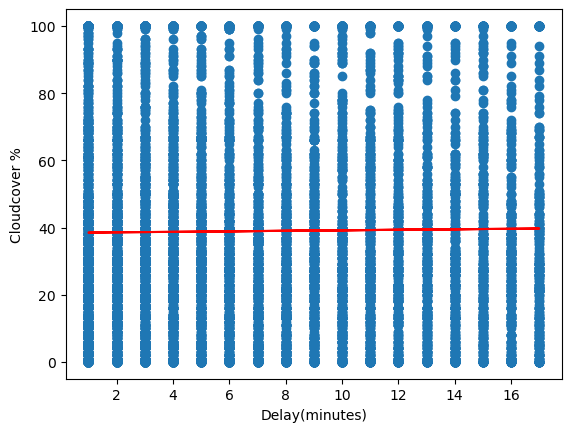

1

In [ ]:

no_outliers_df = remove_outliers(flight_data_updated_df,"Departure_Delay_Minutes")


departure_cloud = no_outliers_df[(no_outliers_df["cloudcover_depart"] != "item not found") & (no_outliers_df["Departure_Delay_Minutes"] != 0)]

x_values = departure_cloud["Departure_Delay_Minutes"]
y_values = departure_cloud["cloudcover_depart"].astype(int)



plot_linear_regression(x_values, y_values,
                       'Cloudcover %',(5,-20))


departure_cloud['Departure_Delay_Minutes'].min()

The r-value is: 0.0004896908994629108


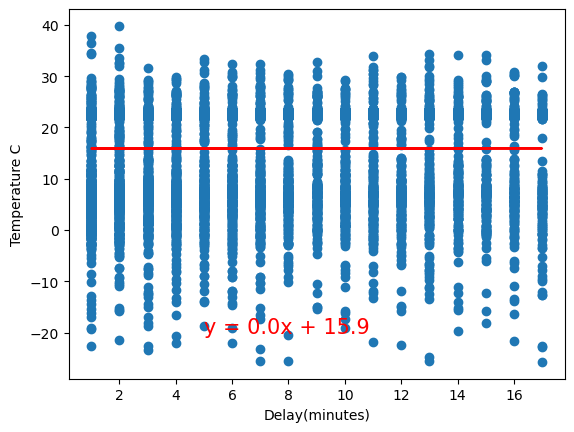

In [ ]:
departure_temp = no_outliers_df[(no_outliers_df["temperature_depart"] != "item not found") & (no_outliers_df["Departure_Delay_Minutes"] != 0)]

x_values = departure_temp["Departure_Delay_Minutes"]
y_values = departure_temp["temperature_depart"].astype(float)



plot_linear_regression(x_values, y_values,
                       'Temperature C',(5,-20))

The r-value is: 0.005749025257288659


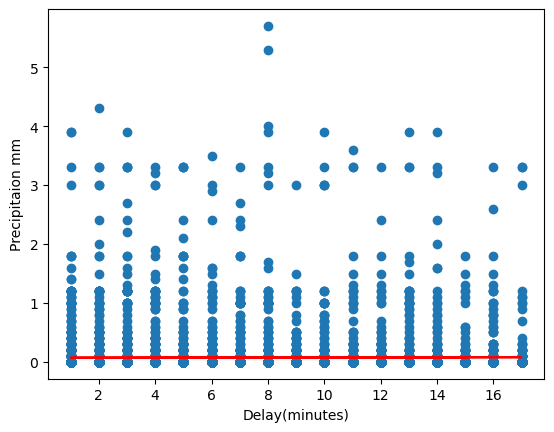

In [ ]:
departure_prec = no_outliers_df[(no_outliers_df["precipitation_depart"] != "item not found") & (no_outliers_df["Departure_Delay_Minutes"] != 0)]

x_values = departure_prec["Departure_Delay_Minutes"]
y_values = departure_prec["precipitation_depart"].astype(float)



plot_linear_regression(x_values, y_values,
                       'Precipitaion mm',(5,-20))

The r-value is: -0.014195589057650369


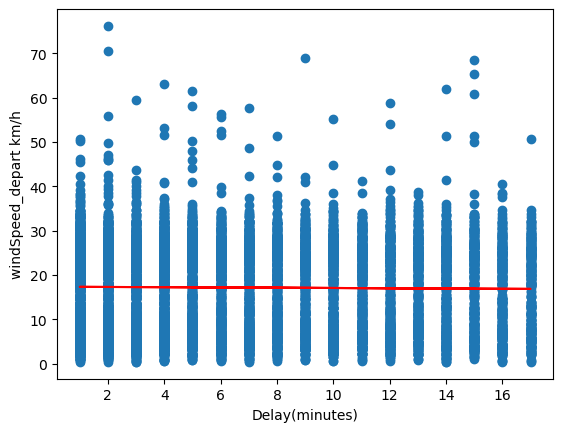

In [ ]:
departure_wind = no_outliers_df[(no_outliers_df["windSpeed_depart"] != "item not found") & (no_outliers_df["Departure_Delay_Minutes"] != 0)]

x_values = departure_prec["Departure_Delay_Minutes"]
y_values = departure_prec["windSpeed_depart"].astype(float)



plot_linear_regression(x_values, y_values,
                       'windSpeed_depart km/h',(5,-20))